# Part I:  For the 49 industry portfolio spreadsheet:

a) 	Consider the cross-sectional regression,
(1)		Ri = γ0 + γM βiM + ηi,					
where γ0 and γM are regression parameters and βiM = cov(Ri, RM)/σ2(RM). If the CAPM holds, then what should γ0 and γM equal (for both the Sharpe/Lintner and Black versions)?


In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Corrected file path
file_path = '/Users/albertzhang/Documents/QI/Problem Sets/Problem Set 3/Problem_Set3_2023.xls'

# Load the Excel data
industry_data = pd.read_excel(file_path, sheet_name='49_Industry_Portfolios', skiprows=6)
market_proxy_data = pd.read_excel(file_path, sheet_name='Market_proxy', skiprows=5)

# Extract industry portfolio returns (columns B to AX)
industry_returns = industry_data.iloc[:, 1:50].dropna()

# Extract market risk premium (Column 2) and risk-free rate (Column 3)
market_risk_premium = market_proxy_data.iloc[:, 1].dropna()
risk_free_rate = market_proxy_data.iloc[:, 2].dropna()

# Replace -99.99 and -999 with NaN in the industry portfolio returns
industry_returns.replace([-99.99, -999], np.nan, inplace=True)

# Ensure the market risk premium and risk-free rate do not contain invalid values
market_risk_premium.replace([-99.99, -999], np.nan, inplace=True)
risk_free_rate.replace([-99.99, -999], np.nan, inplace=True)

# Calculate market return: Market Return = Market Risk Premium + Risk-Free Rate
market_return = market_risk_premium + risk_free_rate

# Initialize lists to store betas and average raw returns for each industry
beta_matrix = []
avg_return_matrix = []

# Time-series regression for each industry portfolio using Sharpe-Lintner CAPM
for column in industry_returns.columns:
    industry_return = industry_returns[column]
    
    # Calculate excess return for the industry: (R_i - R_f)
    industry_excess_return = industry_return - risk_free_rate
    
    # Combine relevant columns and drop rows with NaN values
    combined_data = pd.concat([industry_excess_return, market_risk_premium], axis=1).dropna()
    
    if not combined_data.empty:
        # Time-series regression: (R_i - R_f) = βiM * (R_M - R_f) + ε
        X = sm.add_constant(combined_data.iloc[:, 1])  # Independent variable: (R_M - R_f)
        Y = combined_data.iloc[:, 0]  # Dependent variable: (R_i - R_f)
        model = sm.OLS(Y, X).fit()
        
        # Extract beta (slope) using iloc
        beta = model.params.iloc[1]  # βiM (slope)
        
        # Calculate the average raw return (R_i) for each industry
        avg_return = industry_return.mean()  # Average raw return
        
        # Append beta and average return to their respective lists
        beta_matrix.append(beta)
        avg_return_matrix.append(avg_return)
    else:
        # Append NaN if there was insufficient data for the regression
        beta_matrix.append(np.nan)
        avg_return_matrix.append(np.nan)

# Convert lists to pandas Series for easier handling
beta_matrix = pd.Series(beta_matrix, index=industry_returns.columns)
avg_return_matrix = pd.Series(avg_return_matrix, index=industry_returns.columns)

# Print the results for the beta matrix and average return matrix
print("\nSharpe-Lintner CAPM Beta Matrix (49 Industry Portfolios):")
print(beta_matrix)

print("\nSharpe-Lintner CAPM Average Return Matrix (49 Industry Portfolios):")
print(avg_return_matrix)



Sharpe-Lintner CAPM Beta Matrix (49 Industry Portfolios):
Agric    0.917150
Food     0.725443
Soda     0.831407
Beer     0.942062
Smoke    0.628665
Toys     1.207596
Fun      1.421768
Books    1.116615
Hshld    0.902271
Clths    0.813177
Hlth     1.122114
MedEq    0.837705
Drugs    0.836520
Chems    1.042579
Rubbr    1.212117
Txtls    1.138909
BldMt    1.159646
Cnstr    1.355373
Steel    1.357006
FabPr    1.112992
Mach     1.243169
ElcEq    1.284064
Autos    1.252084
Aero     1.306059
Ships    1.167509
Guns     0.838329
Gold     0.604977
Mines    0.974484
Coal     1.299820
Oil      0.868141
Util     0.778292
Telcm    0.661480
PerSv    1.089987
BusSv    0.889436
Hardw    1.115375
Softw    1.636290
Chips    1.343525
LabEq    0.995773
Paper    1.675818
Boxes    0.952911
Trans    1.137611
Whlsl    1.089085
Rtail    0.965016
Meals    0.945508
Banks    1.044185
Insur    1.120373
RlEst    1.278710
Fin      1.306127
Other    1.054568
dtype: float64

Sharpe-Lintner CAPM Average Return Matrix (

In [14]:
import statsmodels.api as sm
import pandas as pd

# Assuming beta_matrix and avg_return_matrix are already computed and stored as pandas Series.

# Combine the beta and average return data into a DataFrame
valid_data = pd.concat([beta_matrix, avg_return_matrix], axis=1)

# Set proper column names for the combined DataFrame for clarity
valid_data.columns = ['Beta', 'Average Return']

# Drop any NaN values (if any) from betas or average returns
valid_data.dropna(inplace=True)

# Cross-sectional regression: Ri = γ0 + γM * βiM + ηi
# Access 'Beta' and 'Average Return' columns explicitly
X_cross_sectional = sm.add_constant(valid_data['Beta'])  # Independent variable: βiM
Y_cross_sectional = valid_data['Average Return']  # Dependent variable: Ri

# Fit the cross-sectional regression model
cross_sectional_model = sm.OLS(Y_cross_sectional, X_cross_sectional).fit()

# Extract and print regression parameters γ0 and γM using iloc to avoid warnings
gamma_0 = cross_sectional_model.params.iloc[0]  # Intercept γ0
gamma_M = cross_sectional_model.params.iloc[1]  # Coefficient γM

# Print the results
print("\nSharpe-Lintner CAPM Cross-Sectional Regression Parameters:")
print(f"γ0 (Intercept): {gamma_0}")
print(f"γM (Slope, Market Risk Premium): {gamma_M}")

# CAPM implications
print("\nIf the Sharpe-Lintner CAPM holds, γ0 should equal the risk-free rate and γM should equal the market risk premium.")


Sharpe-Lintner CAPM Cross-Sectional Regression Parameters:
γ0 (Intercept): 0.9075251156517704
γM (Slope, Market Risk Premium): 0.12335325203874911

If the Sharpe-Lintner CAPM holds, γ0 should equal the risk-free rate and γM should equal the market risk premium.


In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Corrected file path
file_path = '/Users/albertzhang/Documents/QI/Problem Sets/Problem Set 3/Problem_Set3_2023.xls'

# Load the Excel data
industry_data = pd.read_excel(file_path, sheet_name='49_Industry_Portfolios', skiprows=6)
market_proxy_data = pd.read_excel(file_path, sheet_name='Market_proxy', skiprows=5)

# Extract industry portfolio returns (columns B to AX)
industry_returns = industry_data.iloc[:, 1:50].dropna()

# Extract market return (Column 1)
market_return = market_proxy_data.iloc[:, 0].dropna()

# Replace -99.99 and -999 with NaN in the industry portfolio returns
industry_returns.replace([-99.99, -999], np.nan, inplace=True)

# Ensure the market return does not contain invalid values
market_return.replace([-99.99, -999], np.nan, inplace=True)

# Initialize lists to store betas, intercepts, and average raw returns for each industry
beta_matrix = []
intercept_matrix = []
avg_return_matrix = []

# Time-series regression for each industry portfolio using Black CAPM
for column in industry_returns.columns:
    industry_return = industry_returns[column]
    
    # Combine relevant columns and drop rows with NaN values
    combined_data = pd.concat([industry_return, market_return], axis=1).dropna()
    
    if not combined_data.empty:
        # Time-series regression: R_i = α + βiM * (R_M) + ε (where α is the intercept)
        X = sm.add_constant(combined_data.iloc[:, 1])  # Independent variable: R_M (add constant for intercept)
        Y = combined_data.iloc[:, 0]  # Dependent variable: R_i
        model = sm.OLS(Y, X).fit()
        
        # Extract the intercept (α) and beta (slope)
        intercept = model.params.iloc[0]  # α (intercept)
        beta = model.params.iloc[1]  # βiM (slope)
        
        # Calculate the average raw return (R_i) for each industry
        avg_return = industry_return.mean()  # Average raw return
        
        # Append intercept, beta, and average return to their respective lists
        intercept_matrix.append(intercept)
        beta_matrix.append(beta)
        avg_return_matrix.append(avg_return)
    else:
        # Append NaN if there was insufficient data for the regression
        intercept_matrix.append(np.nan)
        beta_matrix.append(np.nan)
        avg_return_matrix.append(np.nan)

# Convert lists to pandas Series for easier handling
intercept_matrix = pd.Series(intercept_matrix, index=industry_returns.columns)
beta_matrix = pd.Series(beta_matrix, index=industry_returns.columns)
avg_return_matrix = pd.Series(avg_return_matrix, index=industry_returns.columns)

# Print the results for the intercept, beta matrix, and average return matrix
print("\nBlack CAPM Intercept Matrix (49 Industry Portfolios):")
print(intercept_matrix)

print("\nBlack CAPM Beta Matrix (49 Industry Portfolios):")
print(beta_matrix)

print("\nBlack CAPM Average Return Matrix (49 Industry Portfolios):")
print(avg_return_matrix)


Black CAPM Intercept Matrix (49 Industry Portfolios):
Agric    -1.688777
Food     -8.118542
Soda      3.255009
Beer      9.520191
Smoke   -19.953705
Toys     10.476847
Fun      -5.516381
Books     7.482517
Hshld    -1.214909
Clths   -13.644568
Hlth     16.477944
MedEq    -0.356903
Drugs     0.507170
Chems     9.948284
Rubbr    10.766004
Txtls    -7.593963
BldMt    -4.598147
Cnstr     2.325918
Steel    14.183758
FabPr    13.383934
Mach      5.933035
ElcEq     4.061883
Autos    21.289179
Aero     25.901716
Ships   -10.565427
Guns    -23.029364
Gold     36.667448
Mines    -3.429761
Coal     -3.637163
Oil      -0.911947
Util     -0.160597
Telcm    -2.408777
PerSv    13.503951
BusSv     1.710327
Hardw    17.706686
Softw   -60.275541
Chips     3.994377
LabEq     3.376421
Paper    45.288440
Boxes     3.456109
Trans    -7.082973
Whlsl   -20.884884
Rtail    -3.804612
Meals    -8.815518
Banks    21.987841
Insur     4.840082
RlEst     5.736662
Fin      -3.898479
Other     5.682215
dtype: float64

In [20]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'beta_matrix' and 'avg_return_matrix' from Black CAPM are already computed and stored as pandas Series.

# Combine the beta and average return data into a DataFrame
valid_data = pd.concat([beta_matrix, avg_return_matrix], axis=1)

# Set proper column names for the combined DataFrame for clarity
valid_data.columns = ['Beta', 'Average Return']

# Drop any NaN values (if any) from betas or average returns
valid_data.dropna(inplace=True)

# Cross-sectional regression: Ri = γ0 + γM * βiM + ηi (where Ri is the average return and βiM is the beta)
# Access 'Beta' and 'Average Return' columns explicitly
X_cross_sectional = sm.add_constant(valid_data['Beta'])  # Independent variable: βiM (with intercept)
Y_cross_sectional = valid_data['Average Return']  # Dependent variable: Ri

# Fit the cross-sectional regression model
cross_sectional_model = sm.OLS(Y_cross_sectional, X_cross_sectional).fit()

# Extract and print regression parameters γ0 and γM
gamma_0 = cross_sectional_model.params.iloc[0]  # Intercept γ0 (expected to be the "zero-beta return")
gamma_M = cross_sectional_model.params.iloc[1]  # Coefficient γM (expected to be the market return sensitivity)

# Print the results
print("\nBlack CAPM Cross-Sectional Regression Parameters:")
print(f"γ0 (Intercept, Zero-Beta Return): {gamma_0}")
print(f"γM (Slope, Market Sensitivity): {gamma_M}")

# CAPM implications for Black CAPM
print("\nIn the Black CAPM model, γ0 represents the return on the zero-beta portfolio (analogous to the risk-free rate in Sharpe-Lintner CAPM). γM represents the market return sensitivity.")


Black CAPM Cross-Sectional Regression Parameters:
γ0 (Intercept, Zero-Beta Return): 1.037214752621082
γM (Slope, Market Sensitivity): -461.5198208396382

In the Black CAPM model, γ0 represents the return on the zero-beta portfolio (analogous to the risk-free rate in Sharpe-Lintner CAPM). γM represents the market return sensitivity.


b) 	Estimate γ0 and γM using the approach pioneered by Fama and MacBeth. The following  is a brief outline of the procedure:

1. 	Estimate βiM for each portfolio (denote the estimate biM). Assume that the betas do not change over time; hence, you can estimate the betas using full-period OLS regressions.
2.	Each month estimate the cross-sectional regression, Rit = γ0t + γMt biM + nit. Note: the estimated beta (biM ) is the same for every time period (i.e., it has no time subscript).
3.	Compute the time series average of the estimates of γ0 and γM. In addition, compute the standard error and t-stat of the time series averages. 

Can you reject the hypothesis that the proxy for the market portfolio is mean variance efficient? Why or why not?

In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Corrected file path
file_path = '/Users/albertzhang/Documents/QI/Problem Sets/Problem Set 3/Problem_Set3_2023.xls'

# Load the Excel data
industry_data = pd.read_excel(file_path, sheet_name='49_Industry_Portfolios', skiprows=6)
market_proxy_data = pd.read_excel(file_path, sheet_name='Market_proxy', skiprows=5)

# Extract industry portfolio returns (columns B to AX)
industry_returns = industry_data.iloc[:, 1:50].dropna()

# Extract market risk premium (Column 2) and risk-free rate (Column 3)
market_risk_premium = market_proxy_data.iloc[:, 1].dropna()
risk_free_rate = market_proxy_data.iloc[:, 2].dropna()

# Replace -99.99 and -999 with NaN in the industry portfolio returns
industry_returns.replace([-99.99, -999], np.nan, inplace=True)

# Ensure the market risk premium and risk-free rate do not contain invalid values
market_risk_premium.replace([-99.99, -999], np.nan, inplace=True)
risk_free_rate.replace([-99.99, -999], np.nan, inplace=True)

# Calculate market return: Market Return = Market Risk Premium + Risk-Free Rate
market_return = market_risk_premium + risk_free_rate

# Step 1: Estimate betas (biM) for each portfolio using full-period OLS regression
beta_matrix = []
for column in industry_returns.columns:
    industry_return = industry_returns[column]
    combined_data = pd.concat([industry_return, market_return], axis=1).dropna()
    
    if not combined_data.empty:
        X = sm.add_constant(combined_data.iloc[:, 1])  # Market returns
        Y = combined_data.iloc[:, 0]  # Industry returns
        model = sm.OLS(Y, X).fit()
        beta = model.params.iloc[1]  # Extract beta (slope coefficient for market returns)
        beta_matrix.append(beta)
    else:
        beta_matrix.append(np.nan)

# Convert beta matrix to pandas Series
beta_matrix = pd.Series(beta_matrix, index=industry_returns.columns)

# Step 2: Conduct monthly cross-sectional regressions
gamma_0_estimates = []
gamma_M_estimates = []

# Loop through each time period (month)
for month in range(len(industry_returns)):
    monthly_returns = industry_returns.iloc[month]  # Get returns for the month
    valid_data = pd.concat([monthly_returns, beta_matrix], axis=1)
    valid_data.columns = ['Return', 'Beta']  # Set proper column names
    valid_data.dropna(inplace=True)  # Drop any NaN values

    if not valid_data.empty:
        X_cross_sectional = sm.add_constant(valid_data['Beta'])  # Independent variable (β_iM)
        Y_cross_sectional = valid_data['Return']  # Dependent variable (R_it)
        model = sm.OLS(Y_cross_sectional, X_cross_sectional).fit()
        
        gamma_0_estimates.append(model.params.iloc[0])  # Intercept (γ0t)
        gamma_M_estimates.append(model.params.iloc[1])  # Slope (γMt)


# Step 1: Calculate the mean market return (Market Risk Premium) for comparison with γM
market_excess_return_avg = market_risk_premium.mean()  # The average excess return on the market

# Step 2: Conduct the Fama-MacBeth regression as before
# (Assuming you have already estimated gamma_0_estimates and gamma_M_estimates in previous steps)

# Step 3: Compute time series average of γ0 and γM
gamma_0_avg = np.mean(gamma_0_estimates)
gamma_M_avg = np.mean(gamma_M_estimates)

# Step 4: Compute standard errors and t-statistics
gamma_0_se = np.std(gamma_0_estimates, ddof=1) / np.sqrt(len(gamma_0_estimates))
gamma_M_se = np.std(gamma_M_estimates, ddof=1) / np.sqrt(len(gamma_M_estimates))

gamma_0_t_stat = gamma_0_avg / gamma_0_se
gamma_M_t_stat = (gamma_M_avg - market_excess_return_avg) / gamma_M_se  # Compare γM to the market excess return

# Step 5: Print results
print("\nFama-MacBeth Estimates and Hypothesis Testing:")
print(f"γ0 (Intercept) Average: {gamma_0_avg}, Standard Error: {gamma_0_se}, t-stat: {gamma_0_t_stat}")
print(f"γM (Slope, Market Price of Risk) Average: {gamma_M_avg}, Standard Error: {gamma_M_se}, t-stat: {gamma_M_t_stat}")
print(f"\nAverage Market Excess Return: {market_excess_return_avg}")

# Step 6: Interpretation of results
if abs(gamma_0_t_stat) > 2:
    print("\nThe null hypothesis that γ0 = 0 is rejected. This suggests that the market portfolio is not mean-variance efficient.")
else:
    print("\nThe null hypothesis that γ0 = 0 cannot be rejected. This suggests that the market portfolio might be mean-variance efficient.")

if abs(gamma_M_t_stat) > 2:
    print("The null hypothesis that γM equals the average market excess return is rejected.")
else:
    print("The null hypothesis that γM equals the average market excess return cannot be rejected.")


Fama-MacBeth Estimates and Hypothesis Testing:
γ0 (Intercept) Average: 0.8064453389042673, Standard Error: 0.18855694005392065, t-stat: 4.276932679718139
γM (Slope, Market Price of Risk) Average: 0.22204500579947756, Standard Error: 0.25298074420858024, t-stat: -1.6968602408601556

Average Market Excess Return: 0.6513179723502305

The null hypothesis that γ0 = 0 is rejected. This suggests that the market portfolio is not mean-variance efficient.
The null hypothesis that γM equals the average market excess return cannot be rejected.


c)	Estimate the cross-sectional regression, ave(Ri) = γ0 + γM biM + ni.  Are the estimates of γ0 and γM different than the average estimates in part b?  Are the standard errors of the estimates of γ0 and γM different than the standard errors of the average estimates in part b? Why or why not? Which method is superior? Why?

In [30]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Assuming beta_matrix and avg_return_matrix have already been computed from the time series regression.

# Combine the betas (biM) and average returns (ave(Ri)) into a single DataFrame
combined_data = pd.concat([beta_matrix, avg_return_matrix], axis=1)
combined_data.columns = ['Beta', 'Average Return']  # Rename columns for clarity
combined_data.dropna(inplace=True)  # Drop NaN values if any

# Step 1: Cross-sectional regression
X_cross_sectional = sm.add_constant(combined_data['Beta'])  # Independent variable: biM (betas)
Y_cross_sectional = combined_data['Average Return']  # Dependent variable: ave(Ri) (average returns)

# Fit the cross-sectional OLS regression model
cross_sectional_model = sm.OLS(Y_cross_sectional, X_cross_sectional).fit()

# Step 2: Extract the estimates of γ0 and γM using iloc
gamma_0_cross_sectional = cross_sectional_model.params.iloc[0]  # γ0 (intercept)
gamma_M_cross_sectional = cross_sectional_model.params.iloc[1]  # γM (slope, market price of risk)

# Step 3: Extract standard errors of γ0 and γM using iloc
gamma_0_se_cross_sectional = cross_sectional_model.bse.iloc[0]  # Standard error of γ0
gamma_M_se_cross_sectional = cross_sectional_model.bse.iloc[1]  # Standard error of γM

# Step 4: Print the estimates and standard errors for cross-sectional regression
print("\nCross-Sectional Regression Estimates:")
print(f"γ0 (Intercept): {gamma_0_cross_sectional}, Standard Error: {gamma_0_se_cross_sectional}")
print(f"γM (Slope, Market Price of Risk): {gamma_M_cross_sectional}, Standard Error: {gamma_M_se_cross_sectional}")

# Compare with time-series regression estimates (previously calculated)
gamma_0_avg_time_series = np.mean(gamma_0_estimates)
gamma_M_avg_time_series = np.mean(gamma_M_estimates)

# Step 5: Calculate standard errors for time-series regression
gamma_0_se_time_series = np.std(gamma_0_estimates, ddof=1) / np.sqrt(len(gamma_0_estimates))
gamma_M_se_time_series = np.std(gamma_M_estimates, ddof=1) / np.sqrt(len(gamma_M_estimates))

# Print the time-series regression estimates and standard errors for comparison
print("\nTime-Series Regression Estimates (Fama-MacBeth):")
print(f"γ0 (Intercept) Average: {gamma_0_avg_time_series}, Standard Error: {gamma_0_se_time_series}")
print(f"γM (Slope, Market Price of Risk) Average: {gamma_M_avg_time_series}, Standard Error: {gamma_M_se_time_series}")

# Step 6: Compare standard errors
print("\nComparison of Standard Errors:")
print(f"Standard Error of γ0 (Cross-Sectional): {gamma_0_se_cross_sectional} vs Time-Series: {gamma_0_se_time_series}")
print(f"Standard Error of γM (Cross-Sectional): {gamma_M_se_cross_sectional} vs Time-Series: {gamma_M_se_time_series}")

# Step 7: Interpretation of results
if np.isclose(gamma_0_cross_sectional, gamma_0_avg_time_series, atol=1e-5):
    print("\nThe cross-sectional and time-series estimates for γ0 are similar.")
else:
    print("\nThe cross-sectional and time-series estimates for γ0 differ.")

if np.isclose(gamma_M_cross_sectional, gamma_M_avg_time_series, atol=1e-5):
    print("The cross-sectional and time-series estimates for γM are similar.")
else:
    print("The cross-sectional and time-series estimates for γM differ.")


Cross-Sectional Regression Estimates:
γ0 (Intercept): 0.9079417579651676, Standard Error: 0.09296074483913758
γM (Slope, Market Price of Risk): 0.12299993755151745, Standard Error: 0.08461412477813025

Time-Series Regression Estimates (Fama-MacBeth):
γ0 (Intercept) Average: 0.8064453389042673, Standard Error: 0.18855694005392065
γM (Slope, Market Price of Risk) Average: 0.22204500579947756, Standard Error: 0.25298074420858024

Comparison of Standard Errors:
Standard Error of γ0 (Cross-Sectional): 0.09296074483913758 vs Time-Series: 0.18855694005392065
Standard Error of γM (Cross-Sectional): 0.08461412477813025 vs Time-Series: 0.25298074420858024

The cross-sectional and time-series estimates for γ0 differ.
The cross-sectional and time-series estimates for γM differ.


# Comment:
Cross-Sectional Regression: The standard errors are based on a single regression across all portfolios at a specific time. This approach assumes that the relationship between the average returns and betas is stable and does not change over time.
Time-Series Regression (Fama-MacBeth): The standard errors are computed from multiple regressions across different time periods. This method captures variations in the estimates over time, which can lead to larger standard errors due to increased variability.
Hence, time-series regression (Fama-MacBeth) is superior because it takes into account how estimates might vary over different time periods, providing a more robust view of the relationship. 

d)	Plot the ave(Ri) for the portfolios against their biM.  Does the plot resemble a positive relationship?  What should the plot look like?

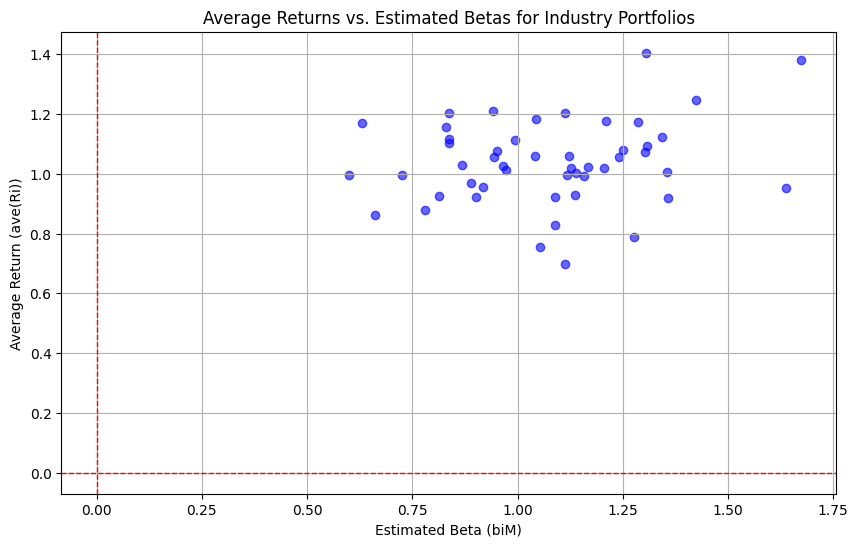

In [31]:
import matplotlib.pyplot as plt

# Ensure that the beta_matrix and avg_return_matrix are combined
plot_data = pd.DataFrame({
    'Beta': beta_matrix,
    'Average Return': avg_return_matrix
}).dropna()  # Drop any NaN values for plotting

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(plot_data['Beta'], plot_data['Average Return'], color='blue', alpha=0.6)
plt.title('Average Returns vs. Estimated Betas for Industry Portfolios')
plt.xlabel('Estimated Beta (biM)')
plt.ylabel('Average Return (ave(Ri))')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add horizontal line at y=0
plt.axvline(0, color='red', linestyle='--', linewidth=1)  # Add vertical line at x=0
plt.grid()
plt.show()

# Comments:
The points appear scattered without a discernible pattern, so it suggests that beta may not be a reliable predictor of average returns for these portfolios. There could be other factors which influence returns beyond just market risk.